**Step 1: Import Python Libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

*Read the CSV file into a pandas DataFrame*

In [2]:
df=pd.read_csv('Salary Prediction of Data Professions.csv')

*Display the first five rows of the DataFrame*

In [3]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


*Display the last five rows of the DataFrame*

In [4]:
df.tail()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1
2638,GREGORY,ABARCA,M,9-18-2014,01-07-2016,Analyst,24.0,49176,Marketing,17.0,13.0,2.0,2


*Shape*

In [5]:
df.shape

(2639, 13)

*Information of Dataset*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


*Summary Statistics*

In [7]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


*Check for Unique Values*

In [8]:
df.nunique()

FIRST NAME          2367
LAST NAME           2475
SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
dtype: int64

In [9]:
df['DESIGNATION'].unique()

array(['Analyst', 'Associate', 'Senior Analyst', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

*Cleaning the Dataset.*
*Missing Values Calculation*

In [10]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

*Checking the Duplicated Values.*

In [11]:
df.duplicated().sum()

161

*Drop Duplicated Values.*

In [12]:
df.drop_duplicates(inplace=True)

*Handling Missing Values*

In [13]:
df.drop(columns=['LAST NAME'], inplace=True)

In [14]:
df['DOJ'].fillna(df['DOJ'].mode()[0], inplace=True)

In [15]:
df['AGE'].fillna(df['AGE'].median(), inplace=True)

In [16]:
df['LEAVES USED'].fillna(30-df['LEAVES REMAINING'], inplace=True)

In [17]:
df['LEAVES REMAINING'].fillna(30-df['LEAVES USED'], inplace=True)

In [18]:
df['RATINGS'].fillna(df['RATINGS'].median(), inplace=True)

In [26]:
print('\n Missing Values After Imputation:')
print(df.isnull().sum())


 Missing Values After Imputation:
FIRST NAME          0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64


In [20]:
df['SALARY'] = df['SALARY'].astype('int')

In [21]:
df['SALARY'].dtype

dtype('int32')

In [24]:
df['SALARY'] = df['SALARY'].astype('int64')

In [25]:
df['SALARY'].dtype

dtype('int64')

**Step 2: Data Visualization**

*SEX DISTRIBUTION*

*Bar Chart Showing Sex Distribution.*

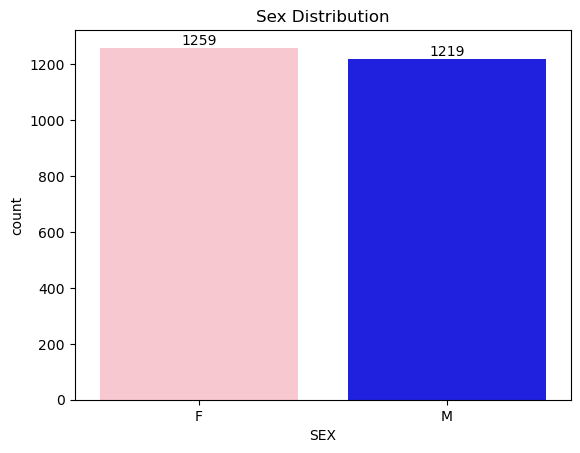

In [27]:
colors = {'M': 'blue', 'F': 'pink'}
ax = sns.countplot(data=df, x='SEX', palette=colors)
ax.set_title('Sex Distribution')
for bars in ax.containers:
    ax.bar_label(bars)

*Plotting a bar chart for Sex vs Salary*

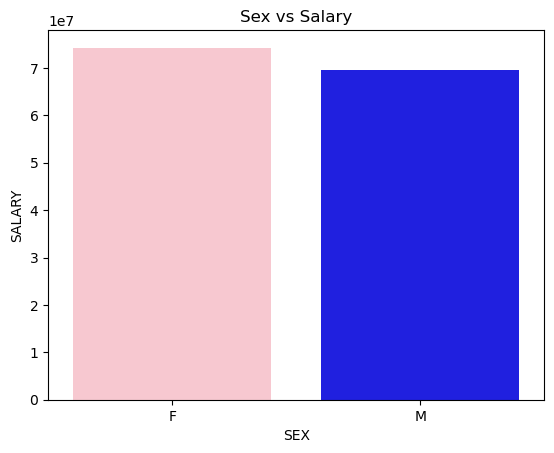

In [28]:
colors = {'M': 'blue', 'F': 'pink'}
salary_gen = df.groupby(['SEX'], as_index=False)['SALARY'].sum().sort_values(by='SALARY', ascending=False)
sns.barplot(x = 'SEX',y= 'SALARY' ,data = salary_gen, palette = colors).set_title('Sex vs Salary')
plt.show()

*From the above graph we see that the salary of the female and even the powe of female are greater than male*

*DESIGNATION*

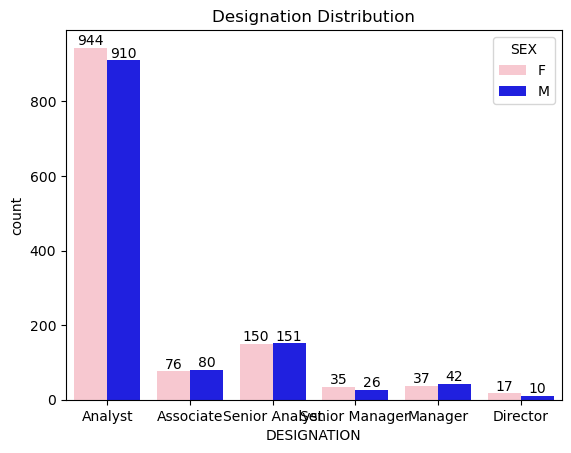

In [29]:
colors = {'M': 'blue', 'F': 'pink'}
ax = sns.countplot(data = df, x = 'DESIGNATION',hue = 'SEX',palette = colors)
ax.set_title('Designation Distribution')
for bars in ax.containers:
    ax.bar_label(bars)

*Salary vs Designation*

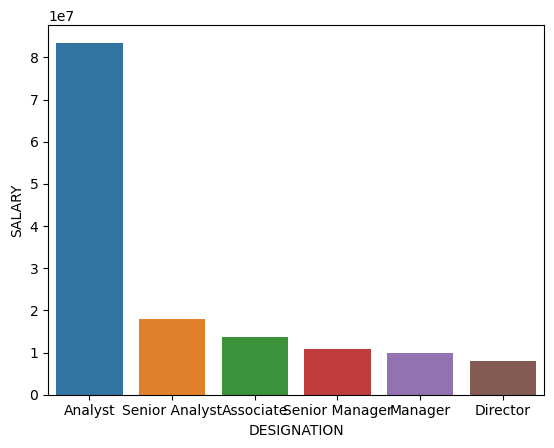

In [30]:
salary_desg = df.groupby(['DESIGNATION'], as_index=False)['SALARY'].sum().sort_values(by='SALARY', ascending=False)
sns.barplot(x = 'DESIGNATION',y= 'SALARY' ,data = salary_desg)
plt.show()

*From the above graph we see that most of the people are from Analyst*

*UNIT*

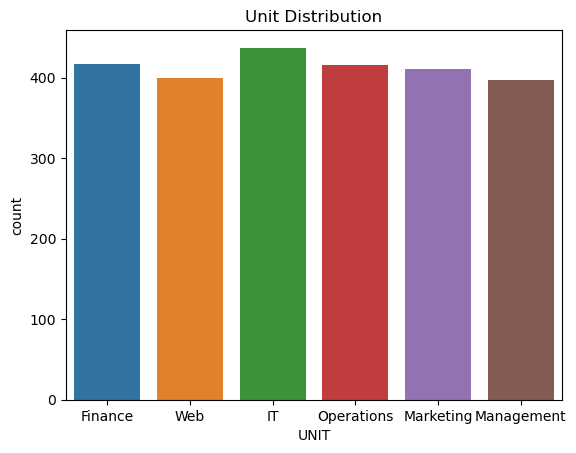

In [31]:
sns.countplot(data=df, x='UNIT').set_title('Unit Distribution')
plt.show()

*RATINGS*

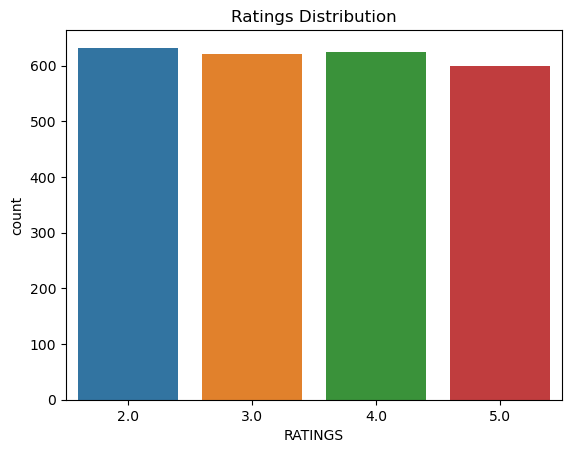

In [32]:
sns.countplot(data=df, x='RATINGS').set_title('Ratings Distribution')
plt.show()

*Data Distribution - Numerical Columns*

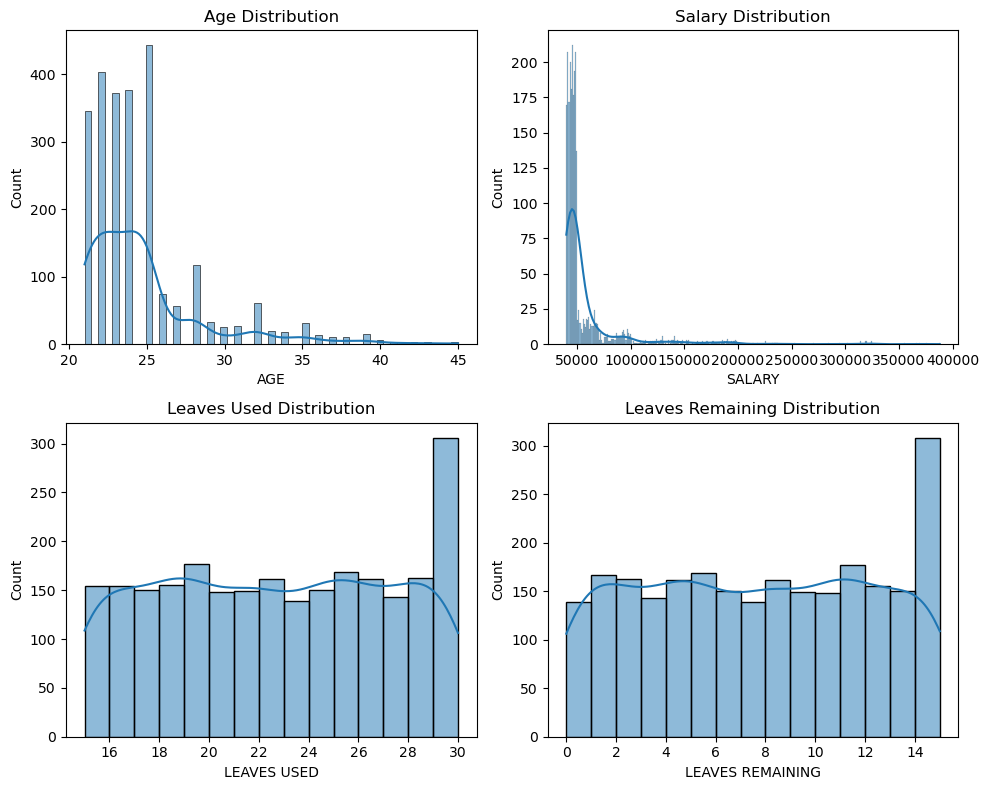

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(df['AGE'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(df['SALARY'], kde=True, ax=axes[0, 1]).set_title('Salary Distribution')
sns.histplot(df['LEAVES USED'], kde=True, ax=axes[1, 0]).set_title('Leaves Used Distribution')
sns.histplot(df['LEAVES REMAINING'], kde=True, ax=axes[1, 1]).set_title('Leaves Remaining Distribution')
plt.tight_layout()
plt.show()

*Pairplot for numerical columns*

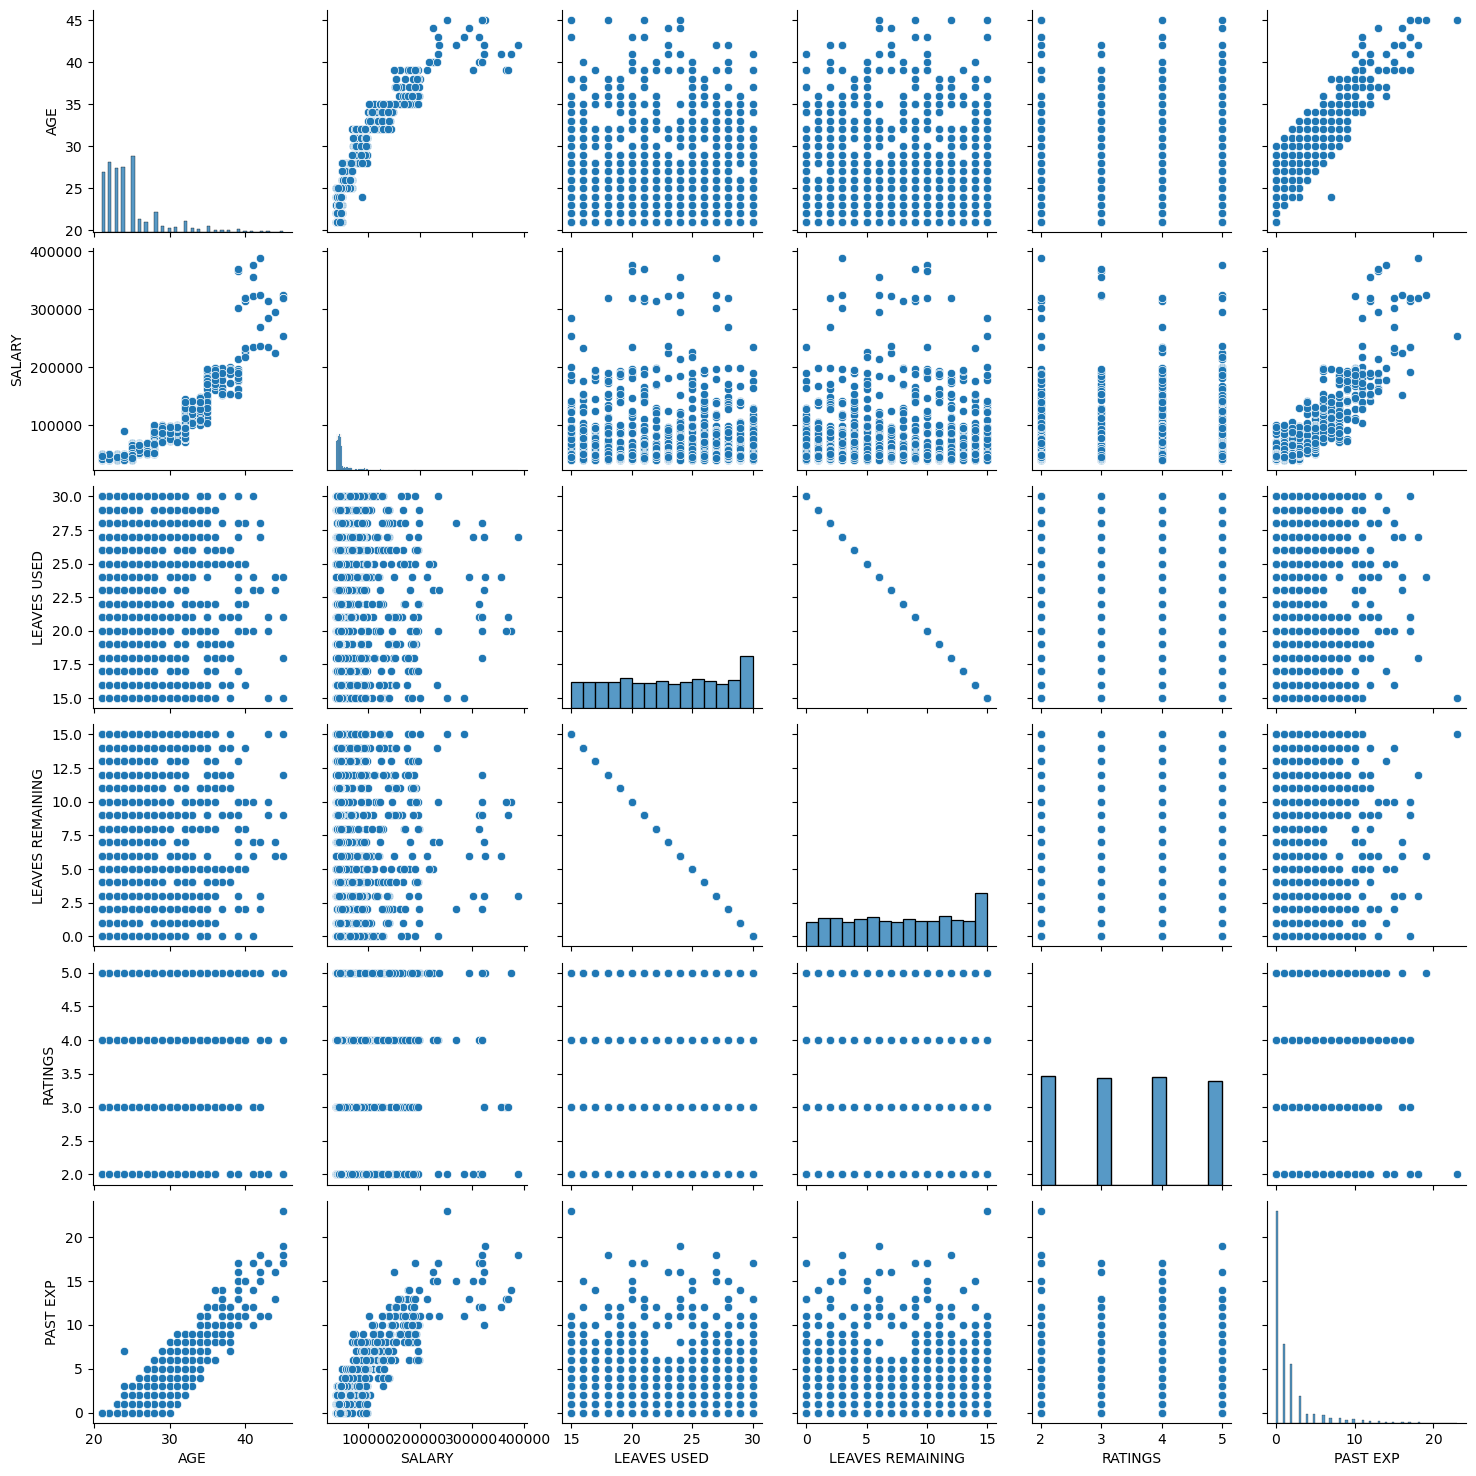

In [34]:
sns.pairplot(df[['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']])
plt.show()

*Boxplot to check for outliers in salary*

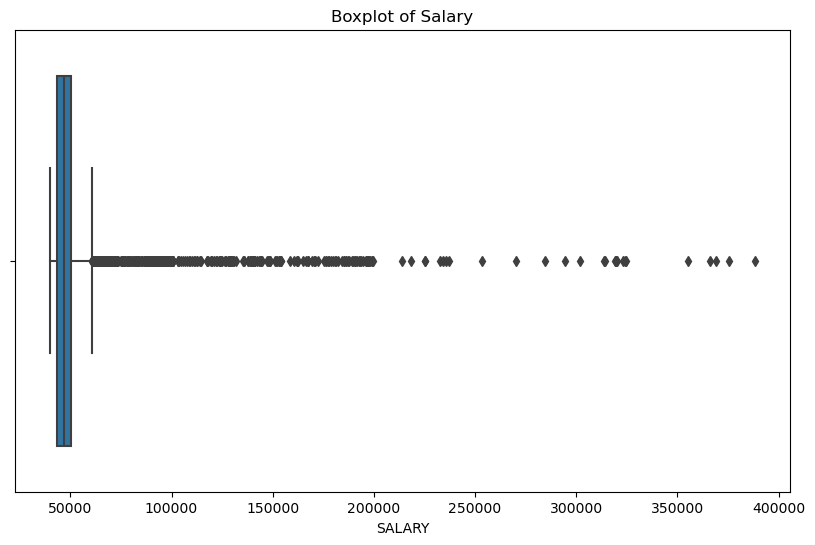

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SALARY'])
plt.title('Boxplot of Salary')
plt.show()

In [36]:
# Minimum and maximum salary
min_salary = df['SALARY'].min()
max_salary = df['SALARY'].max()

# Minimum and maximum age
min_age = df['AGE'].min()
max_age = df['AGE'].max()

# Minimum and maximum ratings
min_ratings = df['RATINGS'].min()
max_ratings = df['RATINGS'].max()

print(f"Minimum Salary: {min_salary}, Maximum Salary: {max_salary}")
print(f"Minimum Age: {min_age}, Maximum Age: {max_age}")
print(f"Minimum Ratings: {min_ratings}, Maximum Ratings: {max_ratings}")

Minimum Salary: 40001, Maximum Salary: 388112
Minimum Age: 21.0, Maximum Age: 45.0
Minimum Ratings: 2.0, Maximum Ratings: 5.0


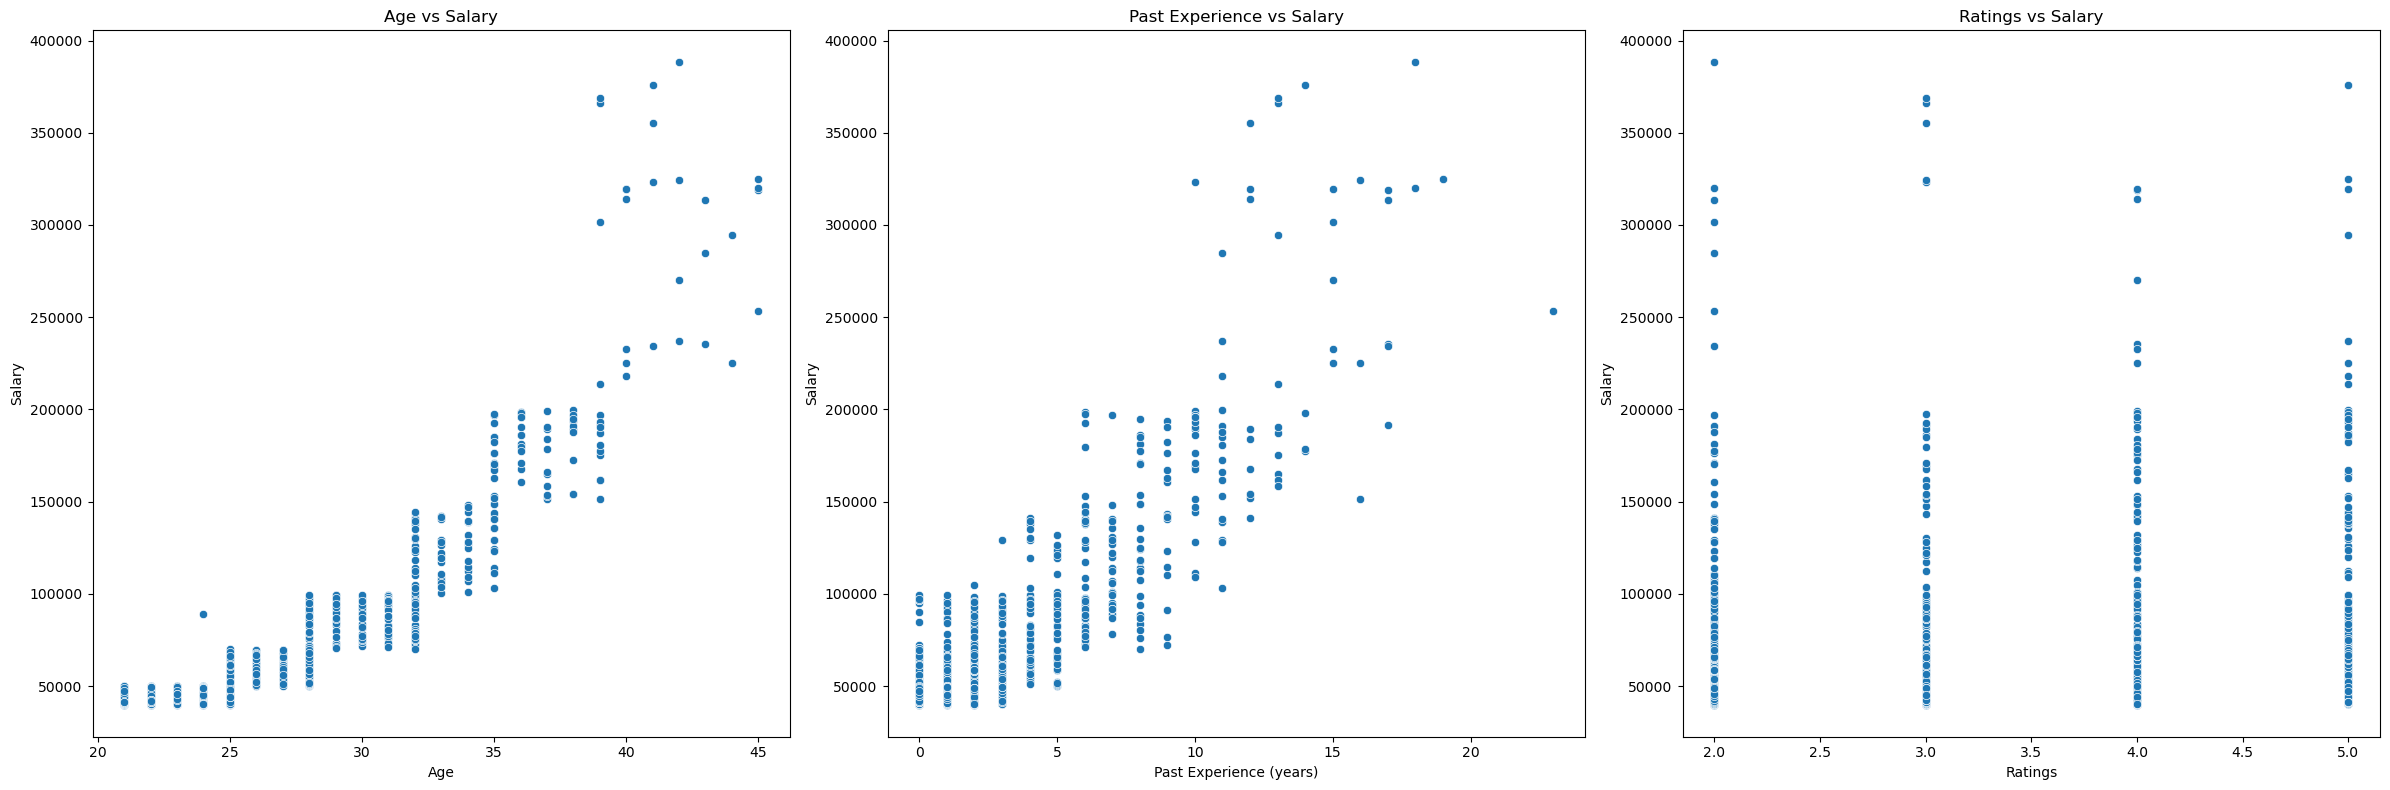

In [37]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Scatter plot: Age vs Salary
sns.scatterplot(x=df['AGE'], y=df['SALARY'], ax=axes[0])
axes[0].set_title('Age vs Salary')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Salary')

# Scatter plot: Past Experience vs Salary
sns.scatterplot(x=df['PAST EXP'], y=df['SALARY'], ax=axes[1])
axes[1].set_title('Past Experience vs Salary')
axes[1].set_xlabel('Past Experience (years)')
axes[1].set_ylabel('Salary')

# Scatter plot: Ratings vs Salary
sns.scatterplot(x=df['RATINGS'], y=df['SALARY'], ax=axes[2])
axes[2].set_title('Ratings vs Salary')
axes[2].set_xlabel('Ratings')
axes[2].set_ylabel('Salary')

# Adjust layout
plt.tight_layout()
plt.show()

**Insights and Patterns from Scatter Plots** After generating and analyzing the scatter plots for Age vs Salary, Past Experience vs Salary, and Ratings vs Salary, we can derive several insights and patterns about the relationships between these variables and salaries of data professionals.

**1. Age vs Salary Trend:** There is a noticeable upward trend, it indicates that salaries tend to increase with age. Clusters: Clusters of points can indicate specific age groups with similar salary ranges. Outliers: Outliers can highlight individuals who earn significantly more or less than their peers at the same age.

**2. Past Experience vs Salary Trend:** An upward trend would suggest that more experienced professionals generally earn higher salaries. This is expected, as experience often correlates with higher pay. Clusters: Clusters may show specific experience ranges where salaries tend to concentrate. Outliers: Identifying outliers can indicate professionals who earn much more or less than others with similar experience.

**3. Ratings vs Salary Trend:** A positive trend would indicate that higher performance ratings are associated with higher salaries. Clusters: Clusters in specific rating ranges can indicate common salary ranges for those ratings. Outliers: Outliers might highlight exceptional cases where individuals earn significantly different salaries despite similar ratings.

**Step 3:Data Preprocessing**

**One-Hot Encoding:** *Convert categorical variables into one-hot encoding to simplify processing.*

In [38]:
df.head()

,FIRST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,F,10-19-2013,01-07-2016,Associate,24.0,89207,Web,17.0,13.0,3.0,7
2,OLIVE,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,M,11-20-2014,01-07-2016,Analyst,24.0,43161,Operations,27.0,3.0,3.0,3


*Encode Categorical Variables*

In [39]:
print(df['UNIT'].unique())
print(df['DESIGNATION'].unique())
print(df['SEX'].unique())

# One-Hot Encoding without dropping the first category
df = pd.get_dummies(df, columns=['SEX', 'DESIGNATION', 'UNIT'], drop_first=False)

# Display the resulting DataFrame
print(df.head())

['Finance' 'Web' 'IT' 'Operations' 'Marketing' 'Management']
['Analyst' 'Associate' 'Senior Analyst' 'Senior Manager' 'Manager'
 'Director']
['F' 'M']
  FIRST NAME         DOJ CURRENT DATE   AGE  SALARY  LEAVES USED  \
0     TOMASA   5-18-2014   01-07-2016  21.0   44570         24.0   
1      ANNIE  10-19-2013   01-07-2016  24.0   89207         17.0   
2      OLIVE   7-28-2014   01-07-2016  21.0   40955         23.0   
3     CHERRY  04-03-2013   01-07-2016  22.0   45550         22.0   
4       LEON  11-20-2014   01-07-2016  24.0   43161         27.0   

   LEAVES REMAINING  RATINGS  PAST EXP  SEX_F  ...  DESIGNATION_Director  \
0               6.0      2.0         0   True  ...                 False   
1              13.0      3.0         7   True  ...                 False   
2               7.0      3.0         0   True  ...                 False   
3               8.0      3.0         0   True  ...                 False   
4               3.0      3.0         3  False  ...          

In [40]:
print(df.isnull().sum())

FIRST NAME                    0
DOJ                           0
CURRENT DATE                  0
AGE                           0
SALARY                        0
LEAVES USED                   0
LEAVES REMAINING              0
RATINGS                       0
PAST EXP                      0
SEX_F                         0
SEX_M                         0
DESIGNATION_Analyst           0
DESIGNATION_Associate         0
DESIGNATION_Director          0
DESIGNATION_Manager           0
DESIGNATION_Senior Analyst    0
DESIGNATION_Senior Manager    0
UNIT_Finance                  0
UNIT_IT                       0
UNIT_Management               0
UNIT_Marketing                0
UNIT_Operations               0
UNIT_Web                      0
dtype: int64


*Display the first five rows of the transformed dataset*

In [41]:
print(df.head())

  FIRST NAME         DOJ CURRENT DATE   AGE  SALARY  LEAVES USED  \
0     TOMASA   5-18-2014   01-07-2016  21.0   44570         24.0   
1      ANNIE  10-19-2013   01-07-2016  24.0   89207         17.0   
2      OLIVE   7-28-2014   01-07-2016  21.0   40955         23.0   
3     CHERRY  04-03-2013   01-07-2016  22.0   45550         22.0   
4       LEON  11-20-2014   01-07-2016  24.0   43161         27.0   

   LEAVES REMAINING  RATINGS  PAST EXP  SEX_F  ...  DESIGNATION_Director  \
0               6.0      2.0         0   True  ...                 False   
1              13.0      3.0         7   True  ...                 False   
2               7.0      3.0         0   True  ...                 False   
3               8.0      3.0         0   True  ...                 False   
4               3.0      3.0         3  False  ...                 False   

   DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
0                False                       False   
1                False    

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2478 entries, 0 to 2638
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIRST NAME                  2478 non-null   object 
 1   DOJ                         2478 non-null   object 
 2   CURRENT DATE                2478 non-null   object 
 3   AGE                         2478 non-null   float64
 4   SALARY                      2478 non-null   int64  
 5   LEAVES USED                 2478 non-null   float64
 6   LEAVES REMAINING            2478 non-null   float64
 7   RATINGS                     2478 non-null   float64
 8   PAST EXP                    2478 non-null   int64  
 9   SEX_F                       2478 non-null   bool   
 10  SEX_M                       2478 non-null   bool   
 11  DESIGNATION_Analyst         2478 non-null   bool   
 12  DESIGNATION_Associate       2478 non-null   bool   
 13  DESIGNATION_Director        2478 non-n

**Step 4:Machine Learning Model**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [44]:
df.drop(columns=['FIRST NAME','DOJ','CURRENT DATE'], inplace=True)

In [45]:
# Features and target variable
X = df.drop(columns=['SALARY'])
y = df['SALARY']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

# Model Evaluation
print("Linear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

# Decision Tree Model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Model Evaluation
print("\nDecision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"R-squared: {r2_score(y_test, y_pred_dt)}")

# Random Forest Model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Model Evaluation
print("\nRandom Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")

# Gradient Boosting Model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Model Evaluation
print("\nGradient Boosting:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"R-squared: {r2_score(y_test, y_pred_gb)}")

Linear Regression:
RMSE: 5058.609172284326
MAE: 3637.475363223882
R-squared: 0.9701085644518582

Decision Tree:
RMSE: 7897.497737277448
MAE: 4980.63998655914
R-squared: 0.9271442994236293

Random Forest:
RMSE: 6041.4297720716295
MAE: 4023.559948641077
R-squared: 0.9573652244204601

Gradient Boosting:
RMSE: 6068.939583980542
MAE: 3854.256441201616
R-squared: 0.9569760632253893


In [48]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linear_reg, file)